https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/05_unsupervised_in_depth.ipynb

# Unsupervised Learning for PCA and K-Means

Topics Covered:
    - Describing PCA for dimensionality reduction
    - Describing how K-means define clusters

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

(-3.459890975768376,
 2.8930305074984073,
 -4.8510780032510414,
 3.1874929507417757)

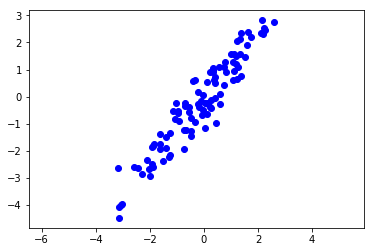

In [2]:
np.random.seed(0)
X = np.dot(np.random.random(size = (5,5)),    # Take Dot Product of 2 Arrays
           np.random.normal(size = (5,100))).T # Draw Random Samples From Gaussian Distribution (size , n_points)

# Take Dot Product of 2 Arrays (5 x 5 Array and 5 x n Array to Create a 5 x n Array)
# Creating 5 Dimensional Data (x1, x2, x3, x4, x5) With 100 Points


plt.plot(X[:, 0], X[:, 1], 'ob')
plt.axis('equal')

https://strata.uga.edu/software/pdf/pcaTutorial.pdf

PCA Finds Principal Axes in the Data to Explain the Variance of the Data Distribution
- Passes A Vector (Axis) Through the Centroid Points of the Data
- Replots Data Coordinates Onto a Smaller Coordinate Model to Measure Variance of Each Axes
- Dimensionality Reduction Involves Taking Many Variables and Creating Only 2 or 3 Meaningful Axes
- Pca Produces Linear Combinations Of The Original Variables To Generate The Axes, Also Known As Principal Components, Or PCs

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
# n_components Determines How Many Components(Features) to Keep (2/3 Best for Visualization?)
pca.fit(X)
print("Variance of 1st, 2nd, 3rd,... Feature(s), Data:")
print(pca.explained_variance_)
print("Vector (Components) of Each Line:")
print(pca.components_)

Variance of 1st, 2nd, 3rd,... Feature(s), Data:
[  1.08489454e+01   1.12943882e+00   1.52678279e-01   1.66742058e-02
   2.38816509e-03]
Vector (Components) of Each Line:
[[-0.40764616 -0.50887036 -0.44358254 -0.40655008 -0.4613319 ]
 [ 0.04492747 -0.11991404  0.30139728 -0.79796448  0.50597876]
 [-0.79449094  0.31607736  0.50015299  0.01014932 -0.13646694]
 [ 0.31178022  0.63915966 -0.04827662 -0.44202943 -0.54456164]
 [ 0.32153284 -0.46716336  0.67816706  0.04976636 -0.46474484]]


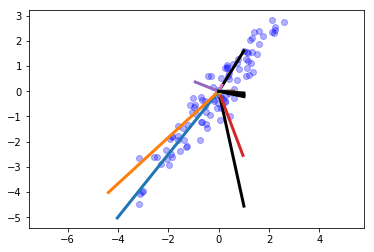

In [4]:
# Test PLot

plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data ()
    plt.plot([0, v[0]], [0, v[1]], [0, v[2]], [0, v[3]], [0, v[4]], '-k', lw=3)
    
# 5 Axes Intersecting At Centroid Point

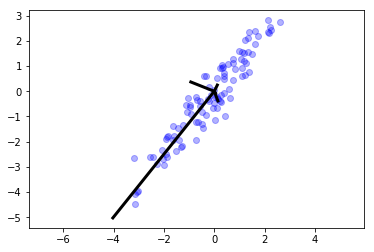

In [5]:
# Plot Two Vectors...?

plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data ()
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
    
# 5 Axes Intersecting At Centroid Point

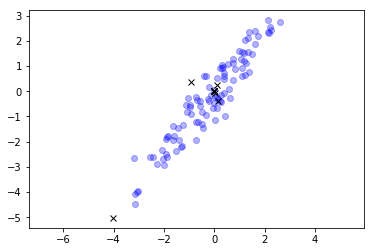

In [6]:
plt.plot(X[:, 0], X[:, 1], 'ob', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # Create a Vector Passing Through the Data (Change 5 to Length)
    plt.plot([0, v[0]], [0, v[1]], 'xk', lw=3)
    
# 5 Axes Intersecting At Centroid Point

In [7]:
clf = PCA(0.95)
# Keepts 95% of the Variance and Tosses the other 5% Variance away 
transform_X = clf.fit_transform(X)
print(X.shape)
print(transform_X.shape)

# clf.fit_transform(X) - Reduces the dimensions of the data

(100, 5)
(100, 2)


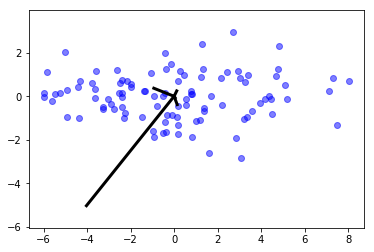

In [8]:
plt.plot(transform_X[:, 0], transform_X[:, 1], 'ob', alpha=0.5)
plt.axis('equal')
for line_length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(line_length) 
# Create a Vector Passing Through the Data (Change 5 to Length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
    
    
# 5 Axes Intersecting At Centroid Point

In [9]:
print(v) # Where the Vector Points Meets the Centroid Point

[ 0.04713883 -0.06848922  0.09942375  0.00729608 -0.06813465]


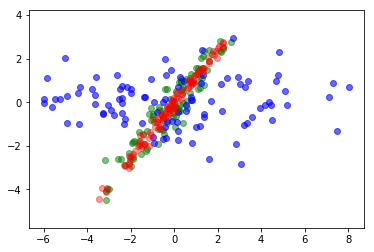

In [16]:
compress_X = clf.inverse_transform(transform_X)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.5) 
plt.plot(transform_X[:, 0], transform_X[:, 1], 'ob', alpha=0.6)
plt.plot(compress_X[:, 0], compress_X[:, 1], 'or', alpha=0.4) 
plt.axis('equal');

# In Red, Throwing 5% of the Variance Away Compresses the Data by Almost Half and Keeping Only Important Features of the Data
# Green POints are the Original Data

# Green - Original Points
# Blue - Transformed Points
# Red - Compressed Points

In [13]:
print(X[0:5]) # First 5 Rows of Original Data

[[ 0.03916602 -1.15225925 -1.57183896 -0.29660155 -1.11333298]
 [ 1.36106284  0.76717103  0.58580359  0.70078551  1.14159274]
 [ 1.26360648  1.10692952  0.92999064  1.17528278  1.19189911]
 [ 0.72731439  0.43989154 -0.21345641  1.14520673  0.0591601 ]
 [-1.42230033 -1.4761613  -2.08324286  0.13521268 -2.56464796]]


In [ ]:
print(X_trans[0:5]) # First 5 Rows of Transformed Data

In [ ]:
print(compress_X[0:5]) # First 5 Rows of Newly Compressed Data

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target

# Reduce to Two Components of the 64-Component Dataset
reduce_components = PCA(2)  
reduced_data = reduce_components.fit_transform(data)
print(data.shape)
print(reduced_data.shape)

(1797, 64)
(1797, 2)


In [18]:
print(data[0:3])

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.   9.   0.]]


In [19]:
print(reduced_data[0:3])

[[ -1.25946624  21.2748809 ]
 [  7.95761206 -20.76869877]
 [  6.99192099  -9.95598641]]


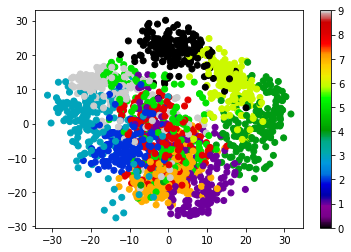

In [28]:
plt.scatter(reduced_data[:,0],reduced_data[:,1], c = target, cmap = cm.nipy_spectral)
plt.colorbar()

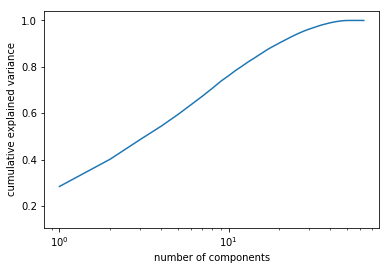

In [23]:
pca = PCA(64).fit(data)
plt.semilogx(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
